# Market in Theory v.s. Market in Practice

> **Author**: Wenxin Ma

In this notebook, we will use the **historical data from ebay** (the auctions took place in 2001) to compare the markets in theory and markets in practice. We assume that all the items sold in the auctions are **homogeneous**.

### Outline

Listed here are some summary statistics that will be used to describe the difference between the imaginary market and the actual market.

-  Calculate and compare **the total surpluses** in the two markets, respectively.

    - total surplus in the imaginary market = $\sum$ (willingness to pay - marginal cost)
    
       - willingness to pay (WTP): given that all products are homogeneous, the highest bid sumbitted by a bidder in all auctions is the WTP of this bidder.
       - marginal cost (MC): the starting price in each auction is the reserve price (i.e. MC) of the seller.
    - total surplus in the actual market = $\sum$ (final price - staring price) where the final price refers to the highest bid submitted in one auction rather than the price paid (i.e. the second highest bid)

-  Calculate and compare the total **seller surpluses** and the total **buyer surpluses** in the two markets, respectively (4 surpluses). 

-  Figure out the **distribution** of the surpluses (who gains and who loses)

To further understand the results we will get, we will also calculate:

- **the number of bids** submitted by each bidder (592') in all the auctions (105') and the ditrsibution among the successful bidders and the unsuccessful ones in the imaginary market.

- **Venn Diagram** of successful and unsuccessful bidders (intersection, union and differences)

- **Surpluses Breakdown** in terms of the type of buyers and sellers (would succeed in the imaginary only, did succeed in the actual market only, or both)

- **Bidding strategies**: we will classify the bidders into 4 types and compute the proportion of bidders of each type who won and the average price conditional on winning.

- **Sellers' Characteristics**: see below

- **Product Homogeneity vs Heterogeneity**: We split the market into 2: one for new items and one for used items and compute the surpluses, average tarding prices, etc..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Description
We have two types of records. For each auction, the first record is for the seller while the rest are for the bidders.

There are 1484 obervations in total; 105 of the them are for the sellers and 1379 for the bidders.

- Among the 105 records for the sellers (105 auctions, 63 unique sellers), there is at least one bidder in each auction. This means all 105 items were successfully traded.

- Among the 1379 records for the buyers, there are 592 unique bidders.

In [2]:
url = "https://raw.githubusercontent.com/michaelpetersubc/eBay/master/data/ebay_data.json"
df=pd.read_json(url)
df.describe()

,auction_number,final_price,starting_price,quantity,number_of_bids,seller_feedback,bidder_feedback,bid_amount
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,55.547844,8.227817,2.722075,0.070755,0.921159,65.063342,39.716981,73.188113
std,31.181690,30.113766,14.430309,0.256501,3.867476,570.882240,271.723342,38.662032
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,50.000000
50%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,80.000000
75%,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,101.002500
max,105.000000,147.500000,141.000000,1.000000,35.000000,8183.000000,10008.000000,147.500000


In [3]:
# create subsets for the sellers and the bidders, respectively
df_seller = df.loc[df.bidder == '']
df_seller.describe()

,auction_number,final_price,starting_price,quantity,number_of_bids,seller_feedback,bidder_feedback,bid_amount
count,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.0,105.0
mean,53.000000,116.286476,38.472000,1.0,13.019048,919.561905,0.0,0.0
std,30.454885,15.639340,39.758499,0.0,7.366740,1963.156142,0.0,0.0
min,1.000000,80.990000,0.010000,1.0,1.000000,0.000000,0.0,0.0
25%,27.000000,105.000000,2.000000,1.0,7.000000,12.000000,0.0,0.0
50%,53.000000,117.500000,20.000000,1.0,13.000000,60.000000,0.0,0.0
75%,79.000000,127.500000,75.000000,1.0,18.000000,581.000000,0.0,0.0
max,105.000000,147.500000,141.000000,1.0,35.000000,8183.000000,0.0,0.0


In [4]:
df_buyer = df.loc[df.item == '']
df_buyer.describe()

,auction_number,final_price,starting_price,quantity,number_of_bids,seller_feedback,bidder_feedback,bid_amount
count,1379.000000,1379.0,1379.0,1379.0,1379.0,1379.0,1379.000000,1379.000000
mean,55.741842,0.0,0.0,0.0,0.0,0.0,42.741117,78.760812
std,31.238630,0.0,0.0,0.0,0.0,0.0,281.656087,34.196785
min,1.000000,0.0,0.0,0.0,0.0,0.0,-5.000000,0.000000
25%,29.000000,0.0,0.0,0.0,0.0,0.0,2.000000,55.000000
50%,58.000000,0.0,0.0,0.0,0.0,0.0,9.000000,85.000000
75%,84.000000,0.0,0.0,0.0,0.0,0.0,29.000000,103.250000
max,105.000000,0.0,0.0,0.0,0.0,0.0,10008.000000,147.500000


### Market in Theory

Recall the definitions:

|Variable|Definition|
|---|---|
|WTP| the highest bid submitted by each bidders (592 in total)|
|MC | the starting price of each auction (105 in total)|
|total surplus| $\sum_{\text{successful trades}} \,$ (WTP - MC)|
|buyer surplus| $\sum_{\text{successful trades}} \,$ (WTP - EQ price)|
|seller surplus| $\sum_{\text{successful trades}} \,$ (EQ price - MC)|

In [5]:
# marginal costs of the sellers in ascending order
mc = df_seller.sort_values(by = 'starting_price')
mc = mc['starting_price']
mc = mc.reset_index(drop=True)
mc = mc.rename('MC')
mc

0        0.01
1        0.01
2        0.01
3        0.01
4        0.01
        ...  
100    110.00
101    110.00
102    115.00
103    120.00
104    141.00
Name: MC, Length: 105, dtype: float64

In [6]:
# the willingnesses to pay of the bidders in descending order
buyer_grouped = df_buyer.groupby('bidder')
buyer_grouped_wtp= buyer_grouped['bid_amount']
wtp = buyer_grouped_wtp.max()
wtp = wtp.sort_values(ascending = False)
wtp = wtp.rename('WTP')
wtp

bidder
alan_knoop,                   147.5
jdlusk83,                     146.0
peter.shelly.1                145.0
rayman65                      145.0
beantiques                    144.5
                              ...  
andrewdoll                      0.0
juanjrodriguez@hotmail.com      0.0
neesey2                         0.0
wch7928786                      0.0
$stein$                         0.0
Name: WTP, Length: 592, dtype: float64

In [7]:
#create 2 dataframes for future use
#(wtp only) and (wtp + corresponding bidder)
wtp_with_bidders = wtp.reset_index()
wtp_only = wtp.reset_index(drop = True)
wtp_with_bidders

,bidder,WTP
0,"alan_knoop,",147.5
1,"jdlusk83,",146.0
2,peter.shelly.1,145.0
3,rayman65,145.0
4,beantiques,144.5
...,...,...
587,andrewdoll,0.0
588,juanjrodriguez@hotmail.com,0.0
589,neesey2,0.0
590,wch7928786,0.0


In [8]:
#construct the imaginary market
img_mkt = pd.concat([wtp_only, mc], axis =1)
img_mkt

,WTP,MC
0,147.5,0.01
1,146.0,0.01
2,145.0,0.01
3,145.0,0.01
4,144.5,0.01
...,...,...
587,0.0,NaN
588,0.0,NaN
589,0.0,NaN
590,0.0,NaN


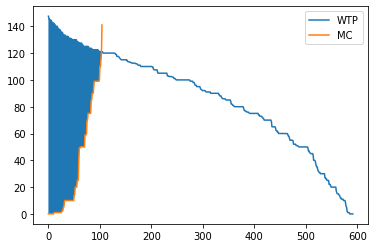

In [9]:
ax = img_mkt.plot()
ax.fill_between(img_mkt.index, img_mkt.WTP, img_mkt.MC)

In [10]:
# calculate the total surplus in the imaginary market (shaded area above)
img_traded = img_mkt[img_mkt['WTP'] >= img_mkt['MC']]
img_traded = img_traded.assign(surplus = img_traded["WTP"] - img_traded["MC"])
img_traded

,WTP,MC,surplus
0,147.50,0.01,147.49
1,146.00,0.01,145.99
2,145.00,0.01,144.99
3,145.00,0.01,144.99
4,144.50,0.01,144.49
...,...,...,...
99,121.21,100.00,21.21
100,121.05,110.00,11.05
101,121.01,110.00,11.01
102,121.00,115.00,6.00


In [11]:
total_img_surplus = img_traded['surplus'].sum()
print('the total surplus in the imaginary market is', total_img_surplus)

the total surplus in the imaginary market is 9686.96


In [12]:
# find the equilibrium price
img_mkt.iloc[104]

WTP    121.0
MC     141.0
Name: 104, dtype: float64

#### Equilibrium Price

The last entry in the traded records is (WTP=121, MC=120);

The next entry (not traded) is (WTP= 121, MC =141).

Therefore, the equilibrium price in the imaginary market is 121.

In [13]:
#calculate the total surpluses for the sellers and the buyers
seller_surplus = (121*104) - img_traded['MC'].sum()
buyer_surplus = img_traded['WTP'].sum()-(121 * 104)
print("the total seller surplus is", seller_surplus)
print("the total buyer surplus is", buyer_surplus)

the total seller surplus is 8685.44
the total buyer surplus is 1001.5200000000004


#### Number of Bids

From above we know there are 105 sellers and 592 buyers while only 104 pairs of them would successfully trade with each other in the imaginary market. A large proportion of bidders failed to find a match. 

This might be the result of a relatively high demand for the processors but a limited ability to produce affordable products. Another explanation for the large number of bidders is that many people who submitted bids in these auctions just wanted to play around and to understand the rules. They do not represent real demand in the market characterized by willness to pay and marginal cost.

To figure out if the latter is true, we can compute the number of bids submitted by the 592 unique bidders who participated in the auctions and see if there is a distinction between that of the successful bidders and that of the unsuccessful ones. 

In [14]:
#count the number of bids submitted by the bidders among all 105 auctions
#recall that buyer_grouped is the subset of all bidders grouped by the unique bidders
number_of_bids = buyer_grouped['quantity']
number_of_bids = number_of_bids.count()
number_of_bids = number_of_bids.rename('number of bids')
number_of_bids = number_of_bids.reset_index()
number_of_bids

,bidder,number of bids
0,$stein$,1
1,(the-bishop),1
2,*dorkus*,2
3,1buckeyes,9
4,1didjit,2
...,...,...
587,zardwpm,5
588,zephd@in-motion.net,2
589,zerozero@xtra.co.nz,3
590,zeta789,1


In [15]:
bidder_wtp_num = pd.merge(wtp_with_bidders, number_of_bids, how='outer', on='bidder')
bidder_wtp_num

,bidder,WTP,number of bids
0,"alan_knoop,",147.5,1
1,"jdlusk83,",146.0,1
2,peter.shelly.1,145.0,5
3,rayman65,145.0,1
4,beantiques,144.5,2
...,...,...,...
587,andrewdoll,0.0,1
588,juanjrodriguez@hotmail.com,0.0,1
589,neesey2,0.0,1
590,wch7928786,0.0,2


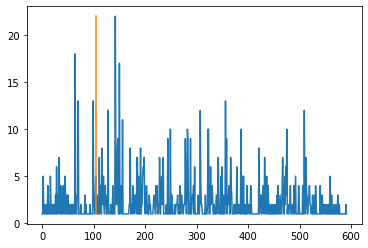

In [16]:
fig, ax = plt.subplots()
bidder_wtp_num['number of bids'].plot()
plt.plot([104,104], [1,22])

In [17]:
bidder_wtp_num['number of bids'].idxmax()
bidder_wtp_num.iloc[142]

bidder            phagen64
WTP                 115.01
number of bids          22
Name: 142, dtype: object

In [18]:
succ = bidder_wtp_num.iloc[:104]
succ_avg = succ['number of bids'].mean()
unsucc = bidder_wtp_num.iloc[105:]
unsucc_avg = unsucc['number of bids'].mean()
unsucc_avg
print('the average of number of bids in the successful bidders is', succ_avg)
print('the average of number of bids in the unsuccessful bidders is', unsucc_avg)

the average of number of bids in the successful bidders is 2.0865384615384617
the average of number of bids in the unsuccessful bidders is 2.375770020533881


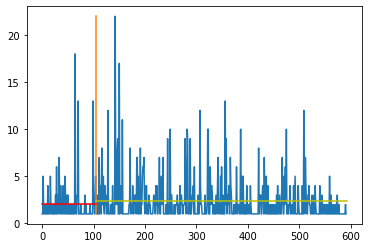

In [19]:
fig, ax = plt.subplots()
bidder_wtp_num['number of bids'].plot()
plt.plot([104,104], [1,22])
plt.plot([0,104],[succ_avg, succ_avg],'r')
plt.plot([105,592],[unsucc_avg,unsucc_avg],'y')

### Market in Practice

First, we define the three surpluses in the actual market:

| |buyer surplus| seller surplus| total surplus|
|---|---|---|---|
|$$\sum$$ each auction |final price - amount paid| amount paid-staring price| final price - starting price|

In [20]:
#calcullate the surplus in the actual market
actual_mkt = df_seller.loc[:,['auction_number','final_price', 'starting_price']]
actual_mkt= actual_mkt.reset_index(drop = True)
actual_mkt = actual_mkt.assign(total_surplus = actual_mkt['final_price']-actual_mkt['starting_price'])
actual_mkt

,auction_number,final_price,starting_price,total_surplus
0,1,105.00,99.00,6.00
1,2,112.50,9.99,102.51
2,3,105.48,9.99,95.49
3,4,142.50,24.88,117.62
4,5,142.50,20.00,122.50
...,...,...,...,...
100,101,122.41,50.00,72.41
101,102,82.00,49.00,33.00
102,103,132.00,59.00,73.00
103,104,92.01,50.00,42.01


In [21]:
#GOAL: find out the second highest bid in each auction
#to deal with the auctions where only one bidder submitted bids, we create a new data set 
#by replacing the bid amount of the seller with the starting price
df_adjusted = df.copy()
df_adjusted.loc[df['bidder'] == '', 'bid_amount'] = df_adjusted.loc[df['bidder'] == '', 'starting_price']
df_adjusted.head()

,auction_number,item,final_price,starting_price,quantity,number_of_bids,starting_time,ending_time,seller,seller_feedback,bidder,bidder_feedback,bid_amount,bid_time
0,1,"""Intel PIII 800 EB FCPGA Socket 370, 256k, 133""",105.0,99.0,1,4,2001-06-28 19:20:32,2001-07-01 19:20:32,cw12,181,,0,99.0,0000-00-00 00:00:00
1,1,,0.0,0.0,0,0,0000-00-00 00:00:00,0000-00-00 00:00:00,,0,"diginet0,",6,105.0,2001-07-01 18:45:25
2,1,,0.0,0.0,0,0,0000-00-00 00:00:00,0000-00-00 00:00:00,,0,diginet0,6,105.0,2001-07-01 18:11:55
3,1,,0.0,0.0,0,0,0000-00-00 00:00:00,0000-00-00 00:00:00,,0,carterwaite,0,102.5,2001-07-01 18:38:31
4,1,,0.0,0.0,0,0,0000-00-00 00:00:00,0000-00-00 00:00:00,,0,prophman,29,99.0,2001-06-29 17:59:34


In [22]:
df_adjusted = df_adjusted.sort_values(by = 'bid_amount', ascending = False)
df_grouped = df_adjusted.groupby('auction_number')
result = df_grouped.nth(1)
#some tests:
#df_seller.loc[df_seller['number_of_bids'] == 1]
#result.loc[result['bidder'] == '']
#df[df.auction_number == 48]
#result.iloc[48]
result = result.reset_index()
result = result[['auction_number', 'bid_amount']]
result = result.rename(columns={'bid_amount':'amount_paid'})
result

,auction_number,amount_paid
0,1,105.00
1,2,110.00
2,3,102.98
3,4,140.00
4,5,140.00
...,...,...
100,101,119.91
101,102,81.00
102,103,130.00
103,104,91.01


In [23]:
#actual_mkt = pd.merge(actual_mkt, result, on='auction_number', how='outer')
actual_mkt
actual = pd.merge(actual_mkt, result, on='auction_number', how='outer')
actual['buyer_surplus'] = actual['final_price']-actual['amount_paid']
actual['seller_surplus'] = actual['amount_paid']-actual['starting_price']
actual = actual[['auction_number','final_price','amount_paid','starting_price',
                'buyer_surplus','seller_surplus','total_surplus']]
actual

,auction_number,final_price,amount_paid,starting_price,buyer_surplus,seller_surplus,total_surplus
0,1,105.00,105.00,99.00,0.0,6.00,6.00
1,2,112.50,110.00,9.99,2.5,100.01,102.51
2,3,105.48,102.98,9.99,2.5,92.99,95.49
3,4,142.50,140.00,24.88,2.5,115.12,117.62
4,5,142.50,140.00,20.00,2.5,120.00,122.50
...,...,...,...,...,...,...,...
100,101,122.41,119.91,50.00,2.5,69.91,72.41
101,102,82.00,81.00,49.00,1.0,32.00,33.00
102,103,132.00,130.00,59.00,2.0,71.00,73.00
103,104,92.01,91.01,50.00,1.0,41.01,42.01


In [24]:
buyer_surplus_act = actual['buyer_surplus'].sum()
seller_surplus_act=actual['seller_surplus'].sum()
total_surplus_act=actual['total_surplus'].sum()

In [25]:
summary = pd.DataFrame([[buyer_surplus, seller_surplus, total_img_surplus],
                       [buyer_surplus_act, seller_surplus_act, total_surplus_act]],
                      index = ['imaginary mkt', 'actual mkt'],
                      columns = ['buyer surplus', 'seller surplus', 'total surplus'])
summary

,buyer surplus,seller surplus,total surplus
imaginary mkt,1001.52,8685.44,9686.96
actual mkt,198.58,7971.94,8170.52


In [26]:
summary['buyer percentage'] = (summary['buyer surplus']/summary['total surplus']).astype(float).map("{:.2%}".format)
summary['seller percentage'] = (summary['seller surplus']/summary['total surplus']).astype(float).map("{:.2%}".format)
order = ['buyer surplus', 'buyer percentage' ,'seller surplus', 'seller percentage' ,  'total surplus']
summary =summary[order]
summary

,buyer surplus,buyer percentage,seller surplus,seller percentage,total surplus
imaginary mkt,1001.52,10.34%,8685.44,89.66%,9686.96
actual mkt,198.58,2.43%,7971.94,97.57%,8170.52


In [27]:
new_row = pd.DataFrame([[(summary.iloc[1,0]-summary.iloc[0,0])/summary.iloc[0,0], np.nan,
                        (summary.iloc[1,2]-summary.iloc[0,2])/summary.iloc[0,2], np.nan,
                       (summary.iloc[1,4]-summary.iloc[0,4])/summary.iloc[0,4]]],
                      index = ['perct change'],columns = order)
new_row['seller surplus'] = new_row['seller surplus'].map('{:,.2%}'.format)
new_row['buyer surplus'] = new_row['buyer surplus'].map('{:,.2%}'.format)
new_row['total surplus'] = new_row['total surplus'].map('{:,.2%}'.format)
new_row

,buyer surplus,buyer percentage,seller surplus,seller percentage,total surplus
perct change,-80.17%,NaN,-8.21%,NaN,-15.65%


In [28]:
summary = pd.concat([summary, new_row])
summary

,buyer surplus,buyer percentage,seller surplus,seller percentage,total surplus
imaginary mkt,1001.52,10.34%,8685.44,89.66%,9686.96
actual mkt,198.58,2.43%,7971.94,97.57%,8170.52
perct change,-80.17%,NaN,-8.21%,NaN,-15.65%


### Intersection, union and differences

To further undertand the significant drop in the surpluses and the change in the distribution, we could separate the bidders into different types, those who would succceed in the imgainary market, those who did succeed in the actual market, or those who succeeded in both markets.

In [29]:
#unique successful bidders in the img mkt
succ_img = wtp_with_bidders.iloc[:104]
succ_img = succ_img[['bidder']]
succ_img = succ_img.drop_duplicates()
succ_img

,bidder
0,"alan_knoop,"
1,"jdlusk83,"
2,peter.shelly.1
3,rayman65
4,beantiques
...,...
99,ernzan
100,pridday1
101,*dorkus*
102,contr


In [30]:
#all and unique successful bidders in the actual market (2 subsets)
succ_act_all = df_buyer.sort_values(by = 'bid_amount', ascending = False)
succ_act_all = succ_act_all.groupby('auction_number')
succ_act_all = succ_act_all.nth(0)

succ_act = succ_act_all[['bidder']]
succ_act = succ_act.reset_index(drop = True)
succ_act = succ_act.drop_duplicates()
succ_act

,bidder
0,diginet0
1,"tomcat_lastdefence_net,"
2,"chuckw97,"
3,"jkahn@kahnmechanical.com,"
4,"stat1k,"
...,...
100,"lwcrawfo@yahoo.com,"
101,"mailetc@mindspring.com,"
102,"jorgemaxit@hotmail.com,"
103,"mmontoya,"


In [31]:
#create an augumented dataframe for future use (add the winner to each auction)
s = succ_act_all.bidder.reset_index()
actual_aug_bidder = pd.merge(s, actual, on = 'auction_number')
actual_aug_bidder

,auction_number,bidder,final_price,amount_paid,starting_price,buyer_surplus,seller_surplus,total_surplus
0,1,diginet0,105.00,105.00,99.00,0.0,6.00,6.00
1,2,"tomcat_lastdefence_net,",112.50,110.00,9.99,2.5,100.01,102.51
2,3,"chuckw97,",105.48,102.98,9.99,2.5,92.99,95.49
3,4,"jkahn@kahnmechanical.com,",142.50,140.00,24.88,2.5,115.12,117.62
4,5,"stat1k,",142.50,140.00,20.00,2.5,120.00,122.50
...,...,...,...,...,...,...,...,...
100,101,"lwcrawfo@yahoo.com,",122.41,119.91,50.00,2.5,69.91,72.41
101,102,"mailetc@mindspring.com,",82.00,81.00,49.00,1.0,32.00,33.00
102,103,"jorgemaxit@hotmail.com,",132.00,130.00,59.00,2.0,71.00,73.00
103,104,"mmontoya,",92.01,91.01,50.00,1.0,41.01,42.01


In [32]:
#now we have 2 subsets of bidders who would succeed in the img mkt and who did succeed in the act mkt, respectively
#2 sets are called succ_img and succ_act
#find the union, intersetion and the differences
union = pd.merge(succ_img, succ_act, how = 'outer')
union.count()

bidder    154
dtype: int64

In [33]:
intersect = succ_img.merge(succ_act)
intersect.count()

bidder    46
dtype: int64

In [34]:
#img only
succ_img_only = succ_img[succ_img.bidder.isin(succ_act.bidder) == False]
succ_img_only.count()

bidder    58
dtype: int64

In [35]:
#act only
succ_act_only = succ_act[succ_act.bidder.isin(succ_img.bidder) == False]
succ_act_only.count()

bidder    50
dtype: int64

In [36]:
#similarly, for the unsuccessful bidders, we have:
all_bidders = df_buyer['bidder'].drop_duplicates().to_frame().reset_index(drop=True)
all_bidders

,bidder
0,"diginet0,"
1,diginet0
2,carterwaite
3,prophman
4,"tomcat_lastdefence_net,"
...,...
587,"mmontoya,"
588,sarasotasam1
589,"cvokoun@swbell.net,"
590,skidoo6701998


In [37]:
unsucc_img = all_bidders[all_bidders.bidder.isin(succ_img.bidder) == False]
unsucc_img.count()

bidder    488
dtype: int64

In [38]:
unsucc_act = all_bidders[all_bidders.bidder.isin(succ_act.bidder) == False]
unsucc_act.count()

bidder    496
dtype: int64

In [39]:
#union
pd.merge(unsucc_img, unsucc_act, how='outer').count()

bidder    546
dtype: int64

In [40]:
#intersection
pd.merge(unsucc_img, unsucc_act, how='inner').count()

bidder    438
dtype: int64

In [41]:
#img only
unsucc_img[unsucc_img.bidder.isin(unsucc_act.bidder) == False].count()

bidder    50
dtype: int64

In [42]:
#act only
unsucc_act[unsucc_act.bidder.isin(unsucc_img.bidder) == False].count()

bidder    58
dtype: int64

#### Summary:


| |imaginary mkt| actual mkt|
|---|---|---|
|successful|104|96|
|unsuccessful|488|496|
|total| 592|592


||imaginary mkt only|intersection| actual mkt only| union|
|---|---|---|---|---|
|successful bidders|58|46|50|154|
|percentage|37.66%|29.87%|32.47%|100%|
|unsuccessful bidders|50|438|58|546|
|percentage|9.16%|80.22%|10.62%|100%|

### Surpluses Breakdown

Now we can breakdown the surpluses based on the classification of the bidders and the sellers (similarly) and verify our previous results.

Meanwhile, from the table above we know that there are 58 bidders who would succeed in the imaginary market but failed in the actual market. This implies that a group of bidders with lower willingnesses to pay replaced those with higher valuations. So it is likely that the bidders who showed up in the intersection were forced to pay higher in the actual market which descreses their surpluses. 

In [43]:
#for buyers
img_only_wtp = wtp_with_bidders[wtp_with_bidders.bidder.isin(succ_img_only.bidder)]
img_only_wtp.count()

bidder    58
WTP       58
dtype: int64

In [44]:
buyer_surplus_img_only = img_only_wtp.WTP.sum() -(121*58)
buyer_surplus_img_only

563.4599999999991

In [45]:
both_wtp = wtp_with_bidders[wtp_with_bidders.bidder.isin(intersect.bidder)]
both_wtp.count()

bidder    46
WTP       46
dtype: int64

In [46]:
buyer_surplus_img_both = both_wtp.WTP.sum()-(121*46)
buyer_surplus_img_both

438.0600000000004

In [47]:
img_only_wtp.WTP.sum() + both_wtp.WTP.sum() -(121*104)

1001.5200000000004

In [48]:
buyer_surplus_act_only = actual_aug_bidder[actual_aug_bidder.bidder.isin(succ_act_only.bidder)].buyer_surplus.sum()
#actual_aug_bidder summarized the actual data
buyer_surplus_act_only

92.88000000000001

In [49]:
buyer_surplus_act_both = actual_aug_bidder[actual_aug_bidder.bidder.isin(intersect.bidder)].buyer_surplus.sum()
buyer_surplus_act_both

105.69999999999996

In [50]:
#for sellers
succ_seller_img = df_seller.sort_values(by = 'starting_price').seller.reset_index(drop = True).head(104).drop_duplicates()
succ_seller_img

#we know that all of the sellers sold their products in the actual market
#so the sellers who would succeed in the imaginary market = the intersetion
#the unsuccessful ones are thus the img_only

0              hdoutlet
6               baine22
11               vman29
12       chesterkingpin
13                mrazk
             ...       
85     finalcallauction
89                 cw12
97           superkimtx
101          mperez0694
103           nicolassy
Name: seller, Length: 62, dtype: object

In [51]:
#NOTICE: there are 105 auctions in total and 63 unique sellers
#to verify the result
df_seller[df_seller.seller.isin(succ_seller_img)].seller.count()

104

In [52]:
seller_surplus_img = (121*104)-df_seller[df_seller.seller.isin(succ_seller_img)].starting_price.sum()
seller_surplus_img

8685.44

In [53]:
seller_act_only = df_seller.sort_values(by ='starting_price').tail(1)
# since the starting price = the final price, the seller surplus in the actual market= 0
seller_act_only

,auction_number,item,final_price,starting_price,quantity,number_of_bids,starting_time,ending_time,seller,seller_feedback,bidder,bidder_feedback,bid_amount,bid_time
907,71,*New* P 3 Intel Pentium III 800 Slot 1 CPU,141.0,141.0,1,1,2001-06-19 12:24:01,2001-06-26 12:24:01,animelibrary,111,,0,0.0,0000-00-00 00:00:00


In [54]:
seller_surplus_both_act = actual_aug_bidder[(actual_aug_bidder.auction_number == 71) == False].seller_surplus.sum()
seller_surplus_both_act

7971.94

In [55]:
breakdown = pd.DataFrame([[buyer_surplus_img_only, buyer_surplus_img_both, buyer_surplus_act_both, buyer_surplus_act_only],
             [0, seller_surplus_img, seller_surplus_both_act, 0]],
            columns = ['Succeed in img only', 'Succeed in both, calculated in img', 'Succeed in both, calculated in act', 'Succeed in act only'],
            index =['buyer surplus', 'seller surplus'])
breakdown

,Succeed in img only,"Succeed in both, calculated in img","Succeed in both, calculated in act",Succeed in act only
buyer surplus,563.46,438.06,105.70,92.88
seller surplus,0.00,8685.44,7971.94,0.00


In [56]:
#verify
#based on the breakdown, we have:
summary_from_breakdown =pd.DataFrame([[breakdown.iloc[0,0]+breakdown.iloc[0,1], breakdown.iloc[0,2]+breakdown.iloc[0,3]],
             [breakdown.iloc[1,0]+breakdown.iloc[1,1], breakdown.iloc[1,2]+breakdown.iloc[1,3]]],
            columns = ['imaginary mkt', 'actual mkt'],
            index = ['buyer surplus', 'seller surplus'])
summary_from_breakdown.T

,buyer surplus,seller surplus
imaginary mkt,1001.52,8685.44
actual mkt,198.58,7971.94


In [57]:
summary

,buyer surplus,buyer percentage,seller surplus,seller percentage,total surplus
imaginary mkt,1001.52,10.34%,8685.44,89.66%,9686.96
actual mkt,198.58,2.43%,7971.94,97.57%,8170.52
perct change,-80.17%,NaN,-8.21%,NaN,-15.65%


In [58]:
#the average price paid by thr intersction in the img market is the EQ price =121

#average price paid by the intersection in the actual market is
actual_aug_bidder[actual_aug_bidder.bidder.isin(intersect.bidder)].amount_paid.mean()

127.67061224489795

### Bidding strategies 

Now we categorize the bidders into **4 types** based on their startegies:

- a single bid in a single auction: bidders who had only submitted bids once among all auctions

- multiple bids in a single auction: bidders who submitted bids more than once but in only one aucion

- sequential bids in multiple auctions (cross bidders): bidders who bade in one auction until they won or failed before moving to the next auction

- random bids in multiple auctions (the others): bidders who participaed in multiple auctions but submitted bids across different auctions rather than following a sequential order. (participate in multiple auctions but are not cross bidders)

We will then compute **the proportion of bidders who won** in each category and **the avergae price paid conditional on winning**.

In [59]:
# type 1: a single bid in a single auction:
type1 = number_of_bids[number_of_bids['number of bids'] == 1]
type1

,bidder,number of bids
0,$stein$,1
1,(the-bishop),1
7,"26215,",1
9,2wildwoods,1
13,351429,1
...,...,...
584,ynotcc,1
585,yodidog,1
586,yuhwei,1
590,zeta789,1


In [60]:
type1_won = actual_aug_bidder[actual_aug_bidder.bidder.isin(type1.bidder)]
type1_won

,auction_number,bidder,final_price,amount_paid,starting_price,buyer_surplus,seller_surplus,total_surplus
0,1,diginet0,105.00,105.00,99.00,0.0,6.00,6.00
1,2,"tomcat_lastdefence_net,",112.50,110.00,9.99,2.5,100.01,102.51
2,3,"chuckw97,",105.48,102.98,9.99,2.5,92.99,95.49
3,4,"jkahn@kahnmechanical.com,",142.50,140.00,24.88,2.5,115.12,117.62
4,5,"stat1k,",142.50,140.00,20.00,2.5,120.00,122.50
...,...,...,...,...,...,...,...,...
100,101,"lwcrawfo@yahoo.com,",122.41,119.91,50.00,2.5,69.91,72.41
101,102,"mailetc@mindspring.com,",82.00,81.00,49.00,1.0,32.00,33.00
102,103,"jorgemaxit@hotmail.com,",132.00,130.00,59.00,2.0,71.00,73.00
103,104,"mmontoya,",92.01,91.01,50.00,1.0,41.01,42.01


In [61]:
type1_price = type1_won.amount_paid.mean()
type1_price

115.72524390243902

In [62]:
df_buyer_remove_1 = df_buyer[df_buyer.bidder.isin(type1.bidder) == False]
df_buyer_remove_1.bidder.count()

1058

In [63]:
type2 = df_buyer_remove_1.groupby('bidder')['auction_number'].nunique()
type2 = type2[type2 == 1].reset_index()
type2 = type2.bidder
type2

0                  1didjit
1              1northpilot
2                    26215
3                  300rock
4                    31305
              ...         
151          who_yer_daddy
152            willijimmac
153                 xad_72
154                zardwpm
155    zerozero@xtra.co.nz
Name: bidder, Length: 156, dtype: object

In [64]:
type2_won = actual_aug_bidder[actual_aug_bidder.bidder.isin(type2)]
type2_won

,auction_number,bidder,final_price,amount_paid,starting_price,buyer_surplus,seller_surplus,total_surplus
53,54,26215,113.5,113.5,10.00,0.0,103.50,103.50
55,56,dchow7,128.5,128.5,90.00,0.0,38.50,38.50
97,98,palenduf,122.5,122.5,0.01,0.0,122.49,122.49
99,100,avill,100.0,100.0,1.00,0.0,99.00,99.00


In [65]:
type2_price = type2_won.amount_paid.mean()
type2_price

116.125

In [66]:
df_buyer_remove_12 = df_buyer_remove_1[df_buyer_remove_1.bidder.isin(type2) == False]
df_buyer_remove_12.bidder.count()
#this is the subset of type 3 and 4 bidders only.

504

In [67]:
#test: participated in at least 2 auctions
df_buyer_remove_12.groupby('bidder').auction_number.nunique().min()

2

In [68]:
df_buyer_remove_12.groupby('bid_time').count();
df[df.auction_number == 14];
#there are 7 entries with empty bid_time
#and if we go back to the primary data, we will find that
#bidders whose bid time is empty (0000-00-00 00:00:00) bade 0 which is lower than the starting price.

In [69]:
min_and_max = df_buyer_remove_12.sort_values(by = 'bid_time').groupby(['bidder','auction_number'])
min_and_max = min_and_max.bid_time.agg([min, max])
min_and_max = min_and_max.reset_index(level = 'auction_number',drop = True)
min_and_max

,min,max
bidder,,
*dorkus*,2001-06-08 09:15:53,2001-06-08 09:15:53
*dorkus*,2001-06-08 08:46:07,2001-06-08 08:46:07
1buckeyes,2001-06-08 19:58:45,2001-06-08 19:58:45
1buckeyes,2001-06-09 14:00:43,2001-06-09 14:00:43
1buckeyes,2001-06-10 08:23:22,2001-06-10 08:23:22
...,...,...
y2ktek,2001-06-13 05:42:38,2001-06-14 03:40:18
y2ktek,2001-06-13 05:44:04,2001-06-17 04:53:56
y2ktek,2001-06-13 05:45:42,2001-06-13 05:45:42


In [70]:
def istype3(df):
    n = df['min'].count()
    ans = [True]
    for i in range(1, n):
        ans.append(df['min'].iloc[i] >= df['max'].iloc[i-1])
    return all(ans)

In [71]:
type3_bool= min_and_max.groupby('bidder').apply(istype3)
type3_bool

bidder
*dorkus*               False
1buckeyes              False
2hummingbirds           True
34pcchips               True
4irons                 False
                       ...  
wch7928786              True
whoseline               True
wlopez007               True
y2ktek                 False
zephd@in-motion.net     True
Length: 115, dtype: bool

In [72]:
type3 = type3_bool[type3_bool]
type3 = type3.reset_index().loc[:,'bidder']
type3.head()

0                   2hummingbirds
1                       34pcchips
2                          adame3
3    adriangonzalez78@hotmail.com
4                       alandarge
Name: bidder, dtype: object

In [73]:
#winner of type 3
type3_won = actual_aug_bidder[actual_aug_bidder.bidder.isin(type3)]
type3_won

,auction_number,bidder,final_price,amount_paid,starting_price,buyer_surplus,seller_surplus,total_surplus
15,16,"jsnyder@microserve.net,",107.5,105.00,50.00,2.50,55.00,57.50
19,20,"jsnyder@microserve.net,",103.0,102.02,10.00,0.98,92.02,93.00
39,40,"jsnyder@microserve.net,",102.5,100.00,50.00,2.50,50.00,52.50
54,55,"reinerc,",127.5,125.00,90.00,2.50,35.00,37.50
56,57,"reinerc,",112.5,110.00,90.00,2.50,20.00,22.50
69,70,mykstrauss,100.0,100.00,99.00,0.00,1.00,1.00
90,91,"mpwu@tcac.net,",138.0,135.50,0.01,2.50,135.49,137.99
91,92,"mpwu@tcac.net,",127.5,125.00,0.01,2.50,124.99,127.49
95,96,"palenduf,",117.5,115.00,0.01,2.50,114.99,117.49


In [74]:
type3_price = type3_won.amount_paid.mean()
type3_price

113.05777777777777

In [75]:
df_buyer_remove_123 = df_buyer_remove_12[df_buyer_remove_12.bidder.isin(type3) == False]
type4 = df_buyer_remove_123.bidder
type4.count()

296

In [76]:
type4_won = actual_aug_bidder[actual_aug_bidder.bidder.isin(type4)]
type4_won

,auction_number,bidder,final_price,amount_paid,starting_price,buyer_surplus,seller_surplus,total_surplus
17,18,"tsgo,",99.01,98.01,9.99,1.0,88.02,89.02
18,19,"tsgo,",86.00,85.00,9.99,1.0,75.01,76.01
21,22,"star2shine,",132.50,130.00,1.00,2.5,129.00,131.50
22,23,"star2shine,",122.50,120.00,1.00,2.5,119.00,121.50
35,36,"joe_simone,",107.50,105.00,75.00,2.5,30.00,32.50
36,37,"joe_simone,",102.50,100.00,75.00,2.5,25.00,27.50
46,47,"rayace,",107.50,105.00,99.00,2.5,6.00,8.50
47,48,"rayace,",100.00,99.00,99.00,1.0,0.00,1.00
48,49,"mustofa123,",99.00,99.00,99.00,0.0,0.00,0.00
49,50,"mustofa123,",100.00,99.00,99.00,1.0,0.00,1.00


In [77]:
type4_price = type4_won.amount_paid.mean()
type4_price

104.001

In [78]:
type_table = pd.DataFrame([[type1.bidder.count(),type2.count(),type3.count(),type4.count()],
              [type1_won.bidder.count()/type1.bidder.count(), type2_won.bidder.count()/type2.count(),
               type3_won.bidder.count()/type3.count(),type4_won.bidder.count()/type4.count()],
             [type1_price,type2_price,type3_price,type4_price]],
            columns = ['single bid in single auction', 'multiple bids in single auction', 
                       'sequential bids in multiple auctions', 'nonsequential bids in multiple auctions'],
            index = ['count','proportion of bidders who won', 'average price conditional on winning'])
type_table.iloc[1] =type_table.iloc[1].map('{:,.2%}'.format)
type_table

,single bid in single auction,multiple bids in single auction,sequential bids in multiple auctions,nonsequential bids in multiple auctions
count,321,156,56,296
proportion of bidders who won,25.55%,2.56%,16.07%,3.38%
average price conditional on winning,115.725,116.125,113.058,104.001


### Sellers' Characteristics

the averge feedbacks of the set of sellers who succeed in both and those who succeed in the actual market only

there is only one seller who failed in the actual market (i.e. succeed in the actual market only)

In [79]:
# the set of sellers who would succeed in the imaginary market (a series of name)
# which is also the intersection
succ_seller_img;
# the one who succeeded in the actual market only (subset of df_seller)
seller_act_only

,auction_number,item,final_price,starting_price,quantity,number_of_bids,starting_time,ending_time,seller,seller_feedback,bidder,bidder_feedback,bid_amount,bid_time
907,71,*New* P 3 Intel Pentium III 800 Slot 1 CPU,141.0,141.0,1,1,2001-06-19 12:24:01,2001-06-26 12:24:01,animelibrary,111,,0,0.0,0000-00-00 00:00:00


In [80]:
seller_intersect = actual_aug_bidder[(actual_aug_bidder.auction_number == 71) == False]
seller_intersect.amount_paid.mean()
seller_intersect.starting_price.mean()

37.48615384615385

In [81]:
df_seller[(df_seller.auction_number == 71) == False].seller_feedback.describe()

count     104.000000
mean      927.336538
std      1971.038052
min         0.000000
25%        11.500000
50%        59.500000
75%       589.000000
max      8183.000000
Name: seller_feedback, dtype: float64

In [82]:
seller_act_only.seller_feedback

907    111
Name: seller_feedback, dtype: int64

### Product Homogeneity

We now split all 105 items sold in the autions into two groups: the new ones (with 'new' in their names) and the used ones (without 'new'). Then we construct an imaginary market and an actual market for both, respectively, and compute the total surpluses to see if releasing the assumption of products being homogeneous helps explain the decline in the total surpluses.

In [86]:
# create a list of booleans for selection 
def lob(s):
    # s is a series
    n = len(s)
    ans = []
    for i in range(n):
        string = s.iloc[i].lower()
        ans_i = ('new' in string)
        ans.append(ans_i)
    return ans

In [87]:
df_seller_copy = df_seller.copy()
df_seller_copy = df_seller_copy.reset_index(drop = True)
b = lob(df_seller_copy.item)
new_items = df_seller_copy[b]
new_items.item.count()
# there are 22 new items sold in the auctoins

22

In [88]:
b_used = [not(i) for i in b]
used_items = df_seller_copy[b_used]
used_items.item.count()
#there are 83 used items sold in the auctions (22+83 =105)

83

In [137]:
df_seller_used = used_items

In [91]:
#subset of buyers records who bade in the auctions where used items were sold
df_buyer_used = df_buyer[df_buyer.auction_number.isin(used_items.auction_number)]
#test:
df_buyer_used.auction_number.nunique()

83

In [92]:
#MC
mc_used = df_seller_used.sort_values(by = 'starting_price')
mc_used = mc_used['starting_price']
mc_used = mc_used.reset_index(drop=True)
mc_used = mc_used.rename('MC of the used')
mc_used

0       0.01
1       0.01
2       0.01
3       0.01
4       0.01
       ...  
78    100.00
79    110.00
80    110.00
81    115.00
82    120.00
Name: MC of the used, Length: 83, dtype: float64

In [93]:
#WTP
wtp_used = df_buyer_used.groupby('bidder').bid_amount.max()
#test
#df_buyer_used.bidder.nunique()
wtp_used = wtp_used.sort_values(ascending = False)
wtp_used_only = wtp_used.reset_index(drop =True)
wtp_used_only = wtp_used_only.rename('WTP of the used')
wtp_used_only
wtp_used_bidders = wtp_used.reset_index()
wtp_used_bidders

,bidder,bid_amount
0,"alan_knoop,",147.50
1,rayman65,145.00
2,beantiques,144.50
3,"beantiques,",144.50
4,"alnova@gateway.net,",142.59
...,...,...
453,danagp@earthlink.net,1.00
454,crazyredboy,1.00
455,fastrakceo,0.06
456,neesey2,0.00


In [94]:
img_used = pd.concat([wtp_used_only, mc_used], axis =1)
img_used

,WTP of the used,MC of the used
0,147.50,0.01
1,145.00,0.01
2,144.50,0.01
3,144.50,0.01
4,142.59,0.01
...,...,...
453,1.00,NaN
454,1.00,NaN
455,0.06,NaN
456,0.00,NaN


In [95]:
img_used_traded = img_used[img_used['WTP of the used'] >= img_used['MC of the used']]
img_used_traded = img_used_traded.assign(surplus = img_used_traded["WTP of the used"] - img_used_traded["MC of the used"])
img_used_traded

,WTP of the used,MC of the used,surplus
0,147.50,0.01,147.49
1,145.00,0.01,144.99
2,144.50,0.01,144.49
3,144.50,0.01,144.49
4,142.59,0.01,142.58
...,...,...,...
78,121.00,100.00,21.00
79,121.00,110.00,11.00
80,121.00,110.00,11.00
81,120.01,115.00,5.01


In [96]:
img_used.iloc[83,:]
# EQ price is 120, all 83 items were sold

WTP of the used    120.0
MC of the used       NaN
Name: 83, dtype: float64

In [97]:
#compute the surpluses
total_surplus_img_used = img_used_traded.surplus.sum()
buyer_surplus_img_used = img_used_traded['WTP of the used'].sum() - (120*83)
seller_surplus_img_used = (120*83) - img_used_traded['MC of the used'].sum()

In [98]:
actual_used = actual_aug_bidder[actual_aug_bidder.auction_number.isin(used_items.auction_number)]
actual_used

,auction_number,bidder,final_price,amount_paid,starting_price,buyer_surplus,seller_surplus,total_surplus
0,1,diginet0,105.00,105.00,99.00,0.0,6.00,6.00
3,4,"jkahn@kahnmechanical.com,",142.50,140.00,24.88,2.5,115.12,117.62
4,5,"stat1k,",142.50,140.00,20.00,2.5,120.00,122.50
7,8,"beantiques,",144.50,144.50,9.99,0.0,134.51,134.51
8,9,"cac@rconnect.com,",80.99,79.99,2.00,1.0,77.99,78.99
...,...,...,...,...,...,...,...,...
97,98,palenduf,122.50,122.50,0.01,0.0,122.49,122.49
98,99,"deimos909,",122.50,120.00,0.01,2.5,119.99,122.49
99,100,avill,100.00,100.00,1.00,0.0,99.00,99.00
101,102,"mailetc@mindspring.com,",82.00,81.00,49.00,1.0,32.00,33.00


In [99]:
total_surplus_act_used = actual_used.total_surplus.sum()
buyer_surplus_act_used = actual_used.buyer_surplus.sum()
seller_surplus_act_used = actual_used.seller_surplus.sum()
avg_price_used =actual_used.amount_paid.mean()
avg_price_used 
# EQ_used = 120

113.28421686746988

In [100]:
#in the entire market
avg_price_total = actual_aug_bidder.amount_paid.mean()
avg_price_total

114.3952380952381

In [101]:
summary_used = pd.DataFrame([[buyer_surplus_img_used, seller_surplus_img_used, total_surplus_img_used],
                       [buyer_surplus_act_used, seller_surplus_act_used, total_surplus_act_used]],
                      index = ['imaginary mkt', 'actual mkt'],
                      columns = ['buyer surplus', 'seller surplus', 'total surplus'])
summary_used = summary_used.T
summary_used['difference'] = summary_used['imaginary mkt']- summary_used['actual mkt']
summary_used = summary_used.T
summary_used

,buyer surplus,seller surplus,total surplus
imaginary mkt,797.47,6490.40,7287.87
actual mkt,153.59,5932.99,6086.58
difference,643.88,557.41,1201.29


In [102]:
summary

,buyer surplus,buyer percentage,seller surplus,seller percentage,total surplus
imaginary mkt,1001.52,10.34%,8685.44,89.66%,9686.96
actual mkt,198.58,2.43%,7971.94,97.57%,8170.52
perct change,-80.17%,NaN,-8.21%,NaN,-15.65%


In [103]:
gap_total_used = total_surplus_img_used - total_surplus_act_used
gap_total_used

1201.2900000000009

In [104]:
gap_total = total_img_surplus -total_surplus_act
gap_total

1516.4399999999987

In [105]:
# how much can the used market explain the gap
'{0:.2%}'.format(gap_total_used/gap_total)

'79.22%'

In [106]:
'{0:.2%}'.format(83/105)

'79.05%'

In [107]:
#MC
mc_new = new_items.starting_price.sort_values().reset_index(drop =True)
mc_new = mc_new.rename('MC of the new')
mc_new

0       1.00
1       1.00
2       1.00
3       1.00
4       1.00
5       1.00
6       1.00
7       1.00
8       9.99
9       9.99
10      9.99
11      9.99
12     14.00
13     20.00
14     20.00
15     50.00
16     50.00
17     50.00
18     59.00
19     59.00
20     59.00
21    141.00
Name: MC of the new, dtype: float64

In [108]:
#wtp
df_buyer_new = df_buyer[df_buyer.auction_number.isin(new_items.auction_number)]
# test
#df_buyer_new.auction_number.nunique()
wtp_new = df_buyer_new.groupby('bidder').bid_amount.max().sort_values(ascending = False)
wtp_new_only = wtp_new.reset_index(drop = True)
wtp_new_only = wtp_new_only.rename('WTP of the new')
wtp_new_only
wtp_new_bidders= wtp_new.reset_index()
wtp_new_bidders

,bidder,bid_amount
0,"jdlusk83,",146.00
1,peter.shelly.1,145.00
2,"jasonwlove1009,",144.01
3,zephd@in-motion.net,142.52
4,"73chrysler,",141.50
...,...,...
177,wch7928786,0.00
178,juanjrodriguez@hotmail.com,0.00
179,iraniam,0.00
180,immoyse,0.00


In [109]:
img_new = pd.concat([wtp_new_only, mc_new], axis =1)
img_new

,WTP of the new,MC of the new
0,146.00,1.0
1,145.00,1.0
2,144.01,1.0
3,142.52,1.0
4,141.50,1.0
...,...,...
177,0.00,NaN
178,0.00,NaN
179,0.00,NaN
180,0.00,NaN


In [110]:
img_traded_new = img_new[img_new['WTP of the new'] >= img_new['MC of the new']]
img_traded_new = img_traded_new.assign(surplus = img_traded_new['WTP of the new'] - img_traded_new['MC of the new'])
img_traded_new

,WTP of the new,MC of the new,surplus
0,146.00,1.00,145.00
1,145.00,1.00,144.00
2,144.01,1.00,143.01
3,142.52,1.00,141.52
4,141.50,1.00,140.50
5,141.00,1.00,140.00
6,139.00,1.00,138.00
7,137.50,1.00,136.50
8,137.29,9.99,127.30
9,135.78,9.99,125.79


In [111]:
img_new.iloc[21]
#EQ price is in (123, 125)
#we assume EQ price =124

WTP of the new    123.71
MC of the new     141.00
Name: 21, dtype: float64

In [112]:
total_surplus_img_new = img_traded_new.surplus.sum()
buyer_surplus_img_new = img_traded_new['WTP of the new'].sum() - (21*124)
seller_surplus_img_new = (21*124) - img_traded_new['MC of the new'].sum()

In [113]:
actual_new = actual_aug_bidder[actual_aug_bidder.auction_number.isin(new_items.auction_number)]
actual_new.head(3)
#actual_new.count()

,auction_number,bidder,final_price,amount_paid,starting_price,buyer_surplus,seller_surplus,total_surplus
1,2,"tomcat_lastdefence_net,",112.50,110.00,9.99,2.5,100.01,102.51
2,3,"chuckw97,",105.48,102.98,9.99,2.5,92.99,95.49
5,6,"jlyon@pf.ueo.ohio-state.edu,",102.50,100.00,1.00,2.5,99.00,101.50


In [114]:
total_surplus_act_new = actual_new.total_surplus.sum()
buyer_surplus_act_new = actual_new.buyer_surplus.sum()
seller_surplus_act_new = actual_new.seller_surplus.sum()
avg_price_new = actual_new.amount_paid.mean()
avg_price_new

118.5868181818182

In [115]:
gap_total_new= total_surplus_img_new - total_surplus_act_new
gap_total_new

315.0399999999995

In [116]:
summary_new = pd.DataFrame([[buyer_surplus_img_new, seller_surplus_img_new, total_surplus_img_new],
                       [buyer_surplus_act_new, seller_surplus_act_new, total_surplus_act_new]],
                      index = ['imaginary mkt', 'actual mkt'],
                      columns = ['buyer surplus', 'seller surplus', 'total surplus'])
summary_new = summary_new.T
summary_new['difference'] = summary_new['imaginary mkt'] - summary_new['actual mkt']
summary_new = summary_new.T
summary_new

,buyer surplus,seller surplus,total surplus
imaginary mkt,223.94,2175.04,2398.98
actual mkt,44.99,2038.95,2083.94
difference,178.95,136.09,315.04


In [117]:
summary_used

,buyer surplus,seller surplus,total surplus
imaginary mkt,797.47,6490.40,7287.87
actual mkt,153.59,5932.99,6086.58
difference,643.88,557.41,1201.29


In [118]:
avg_prices = pd.DataFrame([[83,22, 105],
                           [avg_price_used, avg_price_new, avg_price_total],
                          [gap_total_used, gap_total_new, gap_total]],
                         index = ['count', 'average trade price', 'gap'],
                         columns = ['used', 'new', 'total'])
avg_prices['used perct']= (avg_prices.used / avg_prices.total).map('{0:.2%}'.format)
avg_prices['new perct'] = (avg_prices.new / avg_prices.total).map('{0:.2%}'.format)
avg_prices = avg_prices[['used','used perct', 'new', 'new perct','total']]
avg_prices

,used,used perct,new,new perct,total
count,83.000000,79.05%,22.000000,20.95%,105.000000
average trade price,113.284217,99.03%,118.586818,103.66%,114.395238
gap,1201.290000,79.22%,315.040000,20.77%,1516.440000


### Vienn Diagram under Product Heterogeneity

We have splitted the market into 2: the one for the new items and the one for the used items. Now we repeat the vienn analysis for the two markets respectively, i.e. classify the bidders into 3 categories: those who would succeed in the imaginary market but failed in the actual market, those who did succeed in the actual market but would fail in the imaginary market, and those who would and did succeed in both markets.

Then we will compute the total and average williness to pay in the hope that this will explain the drop in the total surplus.

In [119]:
bidder_img_used = wtp_used_bidders.bidder.head(83)
bidder_img_used = bidder_img_used.drop_duplicates().to_frame()
bidder_img_used.count()

bidder    83
dtype: int64

In [120]:
bidder_act_used = actual_used.bidder.drop_duplicates()
bidder_act_used =bidder_act_used.reset_index(drop=True).to_frame()
bidder_act_used.count()

bidder    75
dtype: int64

In [121]:
img_used_only = bidder_img_used[bidder_img_used.bidder.isin(bidder_act_used.bidder) == False]
img_used_only.count()

bidder    48
dtype: int64

In [122]:
act_used_only = bidder_act_used[bidder_act_used.bidder.isin(bidder_img_used.bidder) == False]
act_used_only.count()

bidder    40
dtype: int64

In [123]:
#the total and average willingness to pay for the bidders who participated in the auctions of used items and would succeed only in the img market.
used_totalwtp_img_only = wtp_used_bidders[wtp_used_bidders.bidder.isin(img_used_only.bidder)].bid_amount.sum()
used_avgwtp_img_only = wtp_used_bidders[wtp_used_bidders.bidder.isin(img_used_only.bidder)].bid_amount.mean()

In [124]:
#the same stats for the act_only_bidders
used_totalwtp_act_only = wtp_used_bidders[wtp_used_bidders.bidder.isin(act_used_only.bidder)].bid_amount.sum()
used_avgwtp_act_only = wtp_used_bidders[wtp_used_bidders.bidder.isin(act_used_only.bidder)].bid_amount.mean()

In [125]:
bidder_img_new = wtp_new_bidders.bidder.head(21).drop_duplicates().to_frame()
bidder_img_new.count()

bidder    21
dtype: int64

In [126]:
bidder_act_new = actual_new.bidder
bidder_act_new = bidder_act_new.reset_index(drop = True).drop_duplicates().to_frame()
bidder_act_new.count()

bidder    22
dtype: int64

In [127]:
img_new_only = bidder_img_new[bidder_img_new.bidder.isin(bidder_act_new.bidder) == False]
img_new_only.count()

bidder    13
dtype: int64

In [128]:
act_new_only = bidder_act_new[bidder_act_new.bidder.isin(bidder_img_new.bidder) == False]
act_new_only.count()

bidder    14
dtype: int64

In [129]:
new_totalwtp_img_only = wtp_new_bidders[wtp_new_bidders.bidder.isin(img_new_only.bidder)].bid_amount.sum()
new_avgwtp_img_only = wtp_new_bidders[wtp_new_bidders.bidder.isin(img_new_only.bidder)].bid_amount.mean()

In [130]:
new_totalwtp_act_only = wtp_new_bidders[wtp_new_bidders.bidder.isin(act_new_only.bidder)].bid_amount.sum()
new_avgwtp_act_only = wtp_new_bidders[wtp_new_bidders.bidder.isin(act_new_only.bidder)].bid_amount.mean()

In [131]:
summary_used

,buyer surplus,seller surplus,total surplus
imaginary mkt,797.47,6490.40,7287.87
actual mkt,153.59,5932.99,6086.58
difference,643.88,557.41,1201.29


In [132]:
summary_new

,buyer surplus,seller surplus,total surplus
imaginary mkt,223.94,2175.04,2398.98
actual mkt,44.99,2038.95,2083.94
difference,178.95,136.09,315.04


In [133]:
bidder_used = pd.DataFrame([[48,35,40],
                           [used_totalwtp_img_only, np.nan, used_totalwtp_act_only],
                           [used_avgwtp_img_only, np.nan, used_avgwtp_act_only]],
                          columns = ['img only, used', 'intersect', 'act only, used'],
                          index = ['count', 'total WTP', 'avg WTP'])

In [134]:
bidder_used

,"img only, used",intersect,"act only, used"
count,48.000000,35.0,40.00000
total WTP,6217.040000,NaN,4197.75000
avg WTP,129.521667,NaN,104.94375


In [135]:
bidder_new = pd.DataFrame([[13,8,14],
                          [new_totalwtp_img_only, np.nan, new_totalwtp_act_only],
                           [new_avgwtp_img_only, np.nan, new_avgwtp_act_only]],
                          columns = ['img only, new', 'intersect', 'act only, new'],
                          index = ['count', 'total WTP', 'avg WTP'])

In [136]:
bidder_new

,"img only, new",intersect,"act only, new"
count,13.000000,8.0,14.000000
total WTP,1735.420000,NaN,1561.380000
avg WTP,133.493846,NaN,111.527143
